# Part 1 -- Intro

Load the tips dataset from seaborn

In [1]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Filter rows by `smoker == 'No'` and `total_bill >= 10`

In [2]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [3]:
tips.loc[(tips['smoker'] == 'No') & (tips['total_bill'] >=10)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
235,10.07,1.25,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,1.75,Male,No,Sat,Dinner,2


### What is the average `total_bill` for each value of `smoker`, `day`, and `time`

In [4]:
tips.groupby(['smoker', 'day', 'time'])

In [5]:
import numpy as np
tips.groupby(['smoker'])[['total_bill']].agg(np.mean)

,total_bill
smoker,
Yes,20.756344
No,19.188278


In [6]:
tips.groupby(['day'])[['total_bill']]

In [7]:
tips.groupby(['day'])[['total_bill']].agg(np.mean)

,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


In [8]:
tips.groupby('time')[['total_bill']].agg(np.mean)

,total_bill
time,
Lunch,17.168676
Dinner,20.797159


# Part 2 -- Tidy

Taken from the r4ds "Tidy Data" Chapter: https://r4ds.had.co.nz/exploratory-data-analysis.html

In [9]:
import pandas as pd

In [10]:
tbl1 = pd.read_csv('../data/table1.csv')

In [11]:
tbl2 = pd.read_csv('../data/table2.csv')

In [12]:
tbl3 = pd.read_csv('../data/table3.csv')

In [13]:
tbl1

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


### Tidy the `tbl2` dataset

In [14]:
tbl2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [15]:
tbl2.pivot_table(index=['country', 'year'],
                columns='type',
            values='count')

type               cases  population
country     year                    
Afghanistan 1999     745    19987071
            2000    2666    20595360
Brazil      1999   37737   172006362
            2000   80488   174504898
China       1999  212258  1272915272
            2000  213766  1280428583

In [16]:
tbl2.pivot_table(index=['country', 'year'],
                columns='type',
                values='count').reset_index()

type,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


### Tidy the `tbl3` dataset

In [17]:
# just give me the population
tbl3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [18]:
tbl3['population'] = tbl3['rate'].str.split('/', expand=True)[1]

In [19]:
tbl3['population'] = tbl3['rate'].str.split('/').str.get(1)

In [20]:
tbl3

,country,year,rate,population
0,Afghanistan,1999,745/19987071,19987071
1,Afghanistan,2000,2666/20595360,20595360
2,Brazil,1999,37737/172006362,172006362
3,Brazil,2000,80488/174504898,174504898
4,China,1999,212258/1272915272,1272915272
5,China,2000,213766/1280428583,1280428583


# Part 3 -- Apply functions

Look at the `table3` dataset

In [21]:
tbl3 = pd.read_csv('../data/table3.csv')
tbl3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


### Write a function that takes a value of `rate` and parses out the total population.

In [22]:
tbl3.dtypes

country    object
year        int64
rate       object
dtype: object

In [23]:
import numpy as np
@np.vectorize
def extract_population(rate):
    data = rate.split('/')
    return data[1]
    
    

In [24]:
extract_population('213766/1280428583')

array('1280428583', dtype='<U10')

In [25]:
tbl3['population'] = extract_population(tbl3['rate'])

In [26]:
tbl3

,country,year,rate,population
0,Afghanistan,1999,745/19987071,19987071
1,Afghanistan,2000,2666/20595360,20595360
2,Brazil,1999,37737/172006362,172006362
3,Brazil,2000,80488/174504898,174504898
4,China,1999,212258/1272915272,1272915272
5,China,2000,213766/1280428583,1280428583


### Set the population to a new column

In [ ]:
tbl3['pop2'] = tbl3['rate'].apply(extract_population)

In [ ]:
tbl3

# Part 4 -- Plots

In [28]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Create a figure with 2 axes
### distplot of `fare` in one axes
### boxplot of `class` and `fare` on the other axes

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

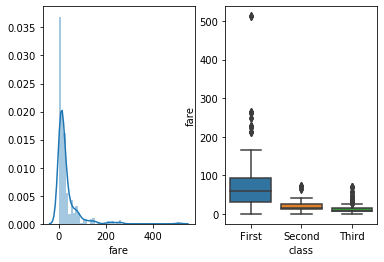

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(titanic.fare, ax=ax1)
sns.boxplot(x='class', y='fare', data=titanic, ax=ax2)

# Part 5 -- Models

In [31]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### Subset `survived`, `class`, `who`

In [33]:
titanic_subset = titanic[["survived", "class", "who"]]

### Create dummy encoded dataset

In [34]:
titanic_dummy = pd.get_dummies(titanic_subset, drop_first=True)
titanic_dummy.head()

,survived,class_Second,class_Third,who_man,who_woman
0,0,0,1,1,0
1,1,0,0,0,1
2,1,0,1,0,1
3,1,0,0,0,1
4,0,0,1,1,0


### Fit a logistic regression on `survived`

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
X = titanic_dummy.iloc[:, 1:]

In [37]:
y = titanic_dummy.iloc[:, 0]

In [38]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

In [39]:
clf.coef_

array([[-0.46549873, -1.01898083, -1.23823732,  0.20337229]])